In [56]:
!pip install rdkit
from rdkit import Chem
import rdkit
rdkit.__version__
import numpy as np

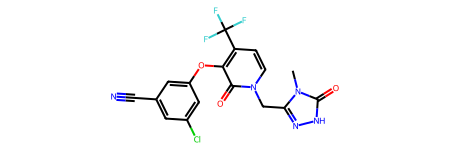

In [3]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine

In [5]:
from rdkit.Chem import Descriptors
print(len(Descriptors._descList))
print(Descriptors._descList)


210
[('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x7a1f3f52ec20>), ('MaxEStateIndex', <function MaxEStateIndex at 0x7a1f3f52eb00>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x7a1f3f52ecb0>), ('MinEStateIndex', <function MinEStateIndex at 0x7a1f3f52eb90>), ('qed', <function qed at 0x7a1f3f561ab0>), ('SPS', <function SPS at 0x7a1f3f561ea0>), ('MolWt', <function <lambda> at 0x7a1f3f5624d0>), ('HeavyAtomMolWt', <function HeavyAtomMolWt at 0x7a1f3f562560>), ('ExactMolWt', <function <lambda> at 0x7a1f3f5625f0>), ('NumValenceElectrons', <function NumValenceElectrons at 0x7a1f3f562680>), ('NumRadicalElectrons', <function NumRadicalElectrons at 0x7a1f3f562710>), ('MaxPartialCharge', <function MaxPartialCharge at 0x7a1f3f562830>), ('MinPartialCharge', <function MinPartialCharge at 0x7a1f3f5628c0>), ('MaxAbsPartialCharge', <function MaxAbsPartialCharge at 0x7a1f3f562950>), ('MinAbsPartialCharge', <function MinAbsPartialCharge at 0x7a1f3f5629e0>), ('FpDensityMorgan1', <functio

# Code for getting Molecular Descriptors

In [6]:
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule

        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res


# Continue

In [7]:
getMolDescriptors(doravirine)

[13:40:30] DEPRECATION WARNING: please use MorganGenerator
[13:40:30] DEPRECATION WARNING: please use MorganGenerator
[13:40:30] DEPRECATION WARNING: please use MorganGenerator


{'MaxAbsEStateIndex': 13.412553309006833,
 'MaxEStateIndex': 13.412553309006833,
 'MinAbsEStateIndex': 0.045220418860841605,
 'MinEStateIndex': -4.871620672188628,
 'qed': 0.6914051268589834,
 'SPS': 11.310344827586206,
 'MolWt': 425.754,
 'HeavyAtomMolWt': 414.66600000000005,
 'ExactMolWt': 425.050251552,
 'NumValenceElectrons': 150,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.4197525104273902,
 'MinPartialCharge': -0.45079941098947357,
 'MaxAbsPartialCharge': 0.45079941098947357,
 'MinAbsPartialCharge': 0.4197525104273902,
 'FpDensityMorgan1': 1.3103448275862069,
 'FpDensityMorgan2': 2.0344827586206895,
 'FpDensityMorgan3': 2.6206896551724137,
 'BCUT2D_MWHI': 35.495691906445956,
 'BCUT2D_MWLOW': 10.182401353178236,
 'BCUT2D_CHGHI': 2.363442602497937,
 'BCUT2D_CHGLO': -2.1532454345808074,
 'BCUT2D_LOGPHI': 2.362094239067197,
 'BCUT2D_LOGPLOW': -2.2620565247489415,
 'BCUT2D_MRHI': 6.30376236817795,
 'BCUT2D_MRLOW': -0.13831572005086737,
 'AvgIpc': 2.951845570725043,
 'BalabanJ': 

In [59]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dhimanray/Machine_Learning_for_Chemistry/main/datasets/clintox.csv')

df.head()

,smiles,FDA_APPROVED,CT_TOX
0,*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0


In [51]:
mol_smiles = df[['smiles']].values[:,0]
mol_smiles

array(['*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC',
       '[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)Cl)Cl)Cl)Cl)Cl',
       '[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)[O-])O)O', ...,
       'O=[Zn]', 'OCl(=O)(=O)=O', 'S=[Se]=S'], dtype=object)

In [60]:
toxicity = df[['CT_TOX']].values[:,0]
toxicity

array([0, 0, 0, ..., 0, 0, 0])

# Continue

In [63]:
molecwt = [Descriptors.MolWt(Chem.MolFromSmiles(m)) for m in mol_smiles]
HBond_Acceptors = [Descriptors.NumHAcceptors(Chem.MolFromSmiles(m)) for m in mol_smiles]

rot_bonds = [Descriptors.NumRotatableBonds(Chem.MolFromSmiles(m)) for m in mol_smiles]
polarSA = [Descriptors.TPSA(Chem.MolFromSmiles(m)) for m in mol_smiles]



In [64]:
dataset = pd.DataFrame({'Mol Wt': molecwt, 'Num HBond Acceptors': HBond_Acceptors, 'Num Rotatable Bonds': rot_bonds, 'Polar Surface Area': polarSA, 'Toxicity': toxicity})
dataset.head()

,Mol Wt,Num HBond Acceptors,Num Rotatable Bonds,Polar Surface Area,Toxicity
0,333.361,7,13,112.19,0
1,290.832,0,0,0.00,0
2,208.122,8,5,161.18,0
3,282.347,2,2,122.34,0
4,342.443,2,10,121.68,0


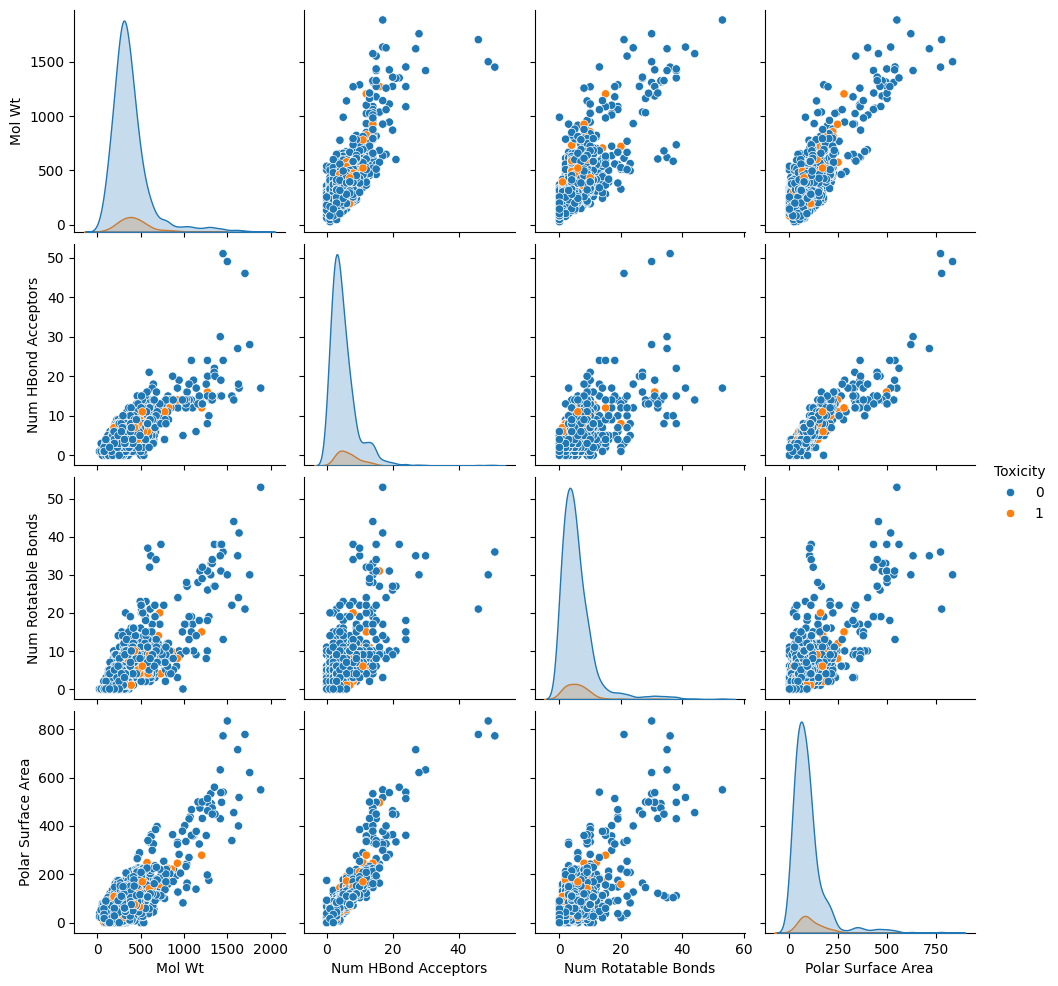

In [65]:
import seaborn as sns
sns.pairplot(dataset,hue='Toxicity')